In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('time-series-19-covid-combined.csv', parse_dates=True)

In [3]:
data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32307 entries, 0 to 32306
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            32307 non-null  object 
 1   Country/Region  32307 non-null  object 
 2   Province/State  9922 non-null   object 
 3   Lat             32307 non-null  float64
 4   Long            32307 non-null  float64
 5   Confirmed       32186 non-null  float64
 6   Recovered       30613 non-null  float64
 7   Deaths          32186 non-null  float64
dtypes: float64(5), object(3)
memory usage: 2.0+ MB


In [5]:
#data cleaning
data.drop(columns=['Province/State','Lat', 'Long'], inplace=True)

In [6]:
df = data.groupby(["Date"])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

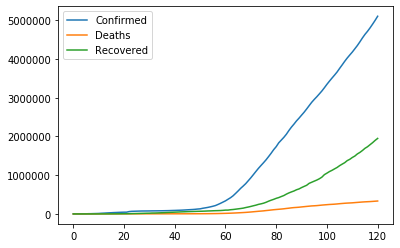

In [7]:
#plotting the data
fig, ax = plt.subplots()
df.plot(ax=ax)
plt.show()

In [8]:
recovered = df[['Date', 'Recovered']]
for index, row in recovered.iterrows():
    if row['Recovered'] is None:
        row['Recovered'] = 0.0
        
death = df[['Date', 'Deaths']]
for index, row in death.iterrows():
    if row['Deaths'] is None:
        row['Deaths'] = 0.0
        
confirmed = df[['Date', 'Confirmed']]
for index, row in confirmed.iterrows():
    if row['Confirmed'] is None:
        row['Confirmed'] = 0.0

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adfuller_test(dataframe, feature):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(dataframe[feature], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)    

In [11]:
# adfuller test for Recovered
adfuller_test(recovered, 'Recovered')

Results of Dickey-Fuller Test:
Test Statistic                   1.043199
p-value                          0.994701
#Lags Used                      12.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [12]:
# adfuller test for Confirmed
adfuller_test(confirmed, 'Confirmed')

Results of Dickey-Fuller Test:
Test Statistic                   1.492390
p-value                          0.997496
#Lags Used                      12.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [13]:
# adfuller test for Deaths
adfuller_test(death, 'Deaths')

Results of Dickey-Fuller Test:
Test Statistic                   0.346969
p-value                          0.979400
#Lags Used                       9.000000
Number of Observations Used    111.000000
Critical Value (1%)             -3.490683
Critical Value (5%)             -2.887952
Critical Value (10%)            -2.580857
dtype: float64


In [14]:
df = df.set_index('Date')

In [15]:
# First differencing
df_stationary = df.diff().dropna()

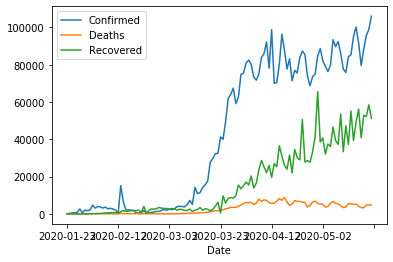

In [16]:
#plotting the data
fig, ax = plt.subplots()
df_stationary.plot(ax=ax)
plt.show()

In [17]:
# adfuller test for Recovered
adfuller_test(df_stationary, 'Recovered')

Results of Dickey-Fuller Test:
Test Statistic                   1.240600
p-value                          0.996255
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [18]:
# adfuller test for Confirmed
adfuller_test(df_stationary, 'Confirmed')

Results of Dickey-Fuller Test:
Test Statistic                  -0.732981
p-value                          0.838021
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [19]:
# adfuller test for Deaths
adfuller_test(df_stationary, 'Deaths')

Results of Dickey-Fuller Test:
Test Statistic                  -1.864616
p-value                          0.348885
#Lags Used                       8.000000
Number of Observations Used    111.000000
Critical Value (1%)             -3.490683
Critical Value (5%)             -2.887952
Critical Value (10%)            -2.580857
dtype: float64


In [20]:
# second order differencing
df_stationary_2nd = df.diff().diff().dropna()

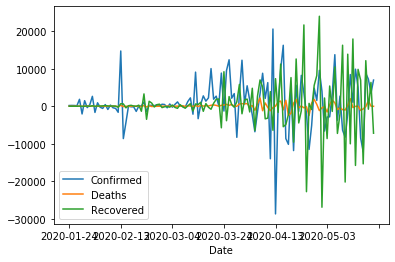

In [21]:
#plotting the data
fig, ax = plt.subplots()
df_stationary_2nd.plot(ax=ax)
plt.show()

In [22]:
# adfuller test for Recovered
adfuller_test(df_stationary_2nd, 'Recovered')

Results of Dickey-Fuller Test:
Test Statistic                  -1.896556
p-value                          0.333683
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [23]:
# adfuller test for Confirmed
adfuller_test(df_stationary_2nd, 'Confirmed')

Results of Dickey-Fuller Test:
Test Statistic                  -1.828557
p-value                          0.366379
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [24]:
# adfuller test for Deaths
adfuller_test(df_stationary_2nd, 'Deaths')

Results of Dickey-Fuller Test:
Test Statistic                  -1.546162
p-value                          0.510565
#Lags Used                       7.000000
Number of Observations Used    111.000000
Critical Value (1%)             -3.490683
Critical Value (5%)             -2.887952
Critical Value (10%)            -2.580857
dtype: float64


### First order differencing best makes the deaths feature stationary and the second order differencing makes the recovered and confirmed features stationary. 

In [25]:
final_df = pd.concat([df_stationary['Deaths'], df_stationary_2nd['Recovered'], df_stationary_2nd['Confirmed']], axis=1)

In [26]:
final_df.head()

,Deaths,Recovered,Confirmed
2020-01-23,1.0,NaN,NaN
2020-01-24,8.0,4.0,188.0
2020-01-25,16.0,-3.0,206.0
2020-01-26,14.0,10.0,191.0
2020-01-27,26.0,-4.0,125.0


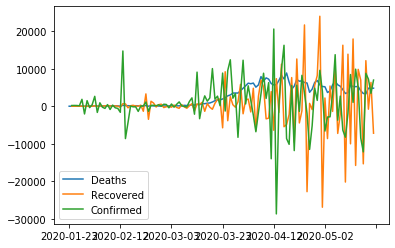

In [27]:
#plotting the data
fig, ax = plt.subplots()
final_df.plot(ax=ax)
plt.show()

In [28]:
# Train-Test split
df_train = final_df.loc[:'2020-03-31']
df_test = final_df.loc['2020-03-31':]

In [29]:
df_train.shape, df_test.shape

((69, 3), (52, 3))

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

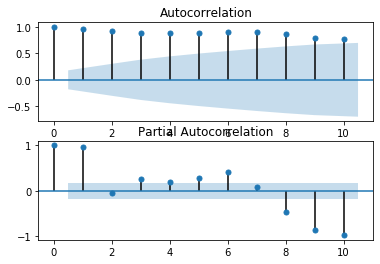

In [31]:
plt.figure()
plt.subplot(211)
plot_acf(final_df["Deaths"], ax= plt.gca(), lags = 10)
plt.subplot(212)
plot_pacf(final_df["Deaths"], ax=plt.gca(), lags = 10)
plt.show()

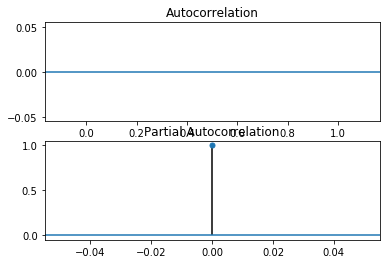

In [33]:
plt.figure()
plt.subplot(211)
plot_acf(final_df["Recovered"], ax= plt.gca(), lags = 10)
plt.subplot(212)
plot_pacf(final_df["Recovered"], ax=plt.gca(), lags = 10)
plt.show()

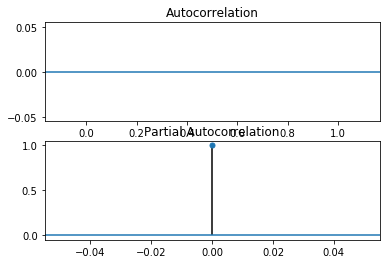

In [34]:
plt.figure()
plt.subplot(211)
plot_acf(final_df["Confirmed"], ax= plt.gca(), lags = 10)
plt.subplot(212)
plot_pacf(final_df["Confirmed"], ax=plt.gca(), lags = 10)
plt.show()